**CAPSTONE PROJECT 3 BIMAYU SATRIYO GUSAMANA**

# **PENDAHULUAN**

**Problem Statement**

Keuntungan sebuah bisnis pada bidang perhotelan sangat bergantung kepada banyaknya kamar yang dipesan. Pada saat ini kemudahan pemesanan kamar dapat dilakukan dalam berbagai bentuk, seperti langsung datang ke hotel individu maupun agen, pemesanan lewat web hotel, pemesanan lewat paliaksi pihak ketiga. Namun kemudahan itu juga yang menjadi masalah baru yaitu masalah kemudahan dalam pembatalan pemesanan kamar. Dengan itu prediksi untuk mengetahui pembatalan pemesanan sangat membantu bisnis perhotelan. Tapi dengan prediksi tersebut juga dapat menimbulkan overbooking.

**Tujuan**

Tujuan dibuatnya model Machine Learning ini adalah untuk mengetahui atau mendeteksi pola pemesanan kamar apakah akan terjadi pembatalan pemesanan kamar. Dengan itu pemilik bisnis perhotelan bisa melihat probabilitas kamar yang batal dipesan dan juga bisa mengetahui strategi untuk membantu jika terjadinya overbooking.

**Pendekatan Analitik**

Untuk mencapai tujuan dari machine learning ini maka model yang digunakan adalah model klasifikasi karena tujuannya adalah mengetahui apakah pembatalan terjadi (ya/tidak).

**Evaluasi Metiks**

Dalam hal ini kelas positifnya adalah 1 atau batal
kelas negatifnya adalah 0 atau tidak batal

Probabilitas konsekuensi yang terjadi dari model prediksi adalah :
1. False Negative : Model memprediksi tamu tidak akan membatalkan pesanan namun ternyata membatalkan pesanan. Hal ini dapat merugikan pemilik hotel. 
2. False Positive : Model memprediksi tamu akan membatalkan pesanan namun ternyata tidak membatalkan pesanan. Hal ini dapat membuat overbooking.

Dari konsekuensi di atas maka metriks utama yang akan dipakai adalah F2 score.

In [1]:
import pandas as pd
import numpy as np

#visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#feature enginering
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,RobustScaler,MinMaxScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer


#model
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,classification_report,confusion_matrix,make_scorer,fbeta_score, roc_auc_score,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline


# **DATA UNDERSTANDING** #

## **Fitur** ##

Features
-	country: Country of origin.
-	market_segment: Market segment designation. 
-	previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.
-	booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
-	deposit_type: Indication on if the customer made a deposit to guarantee the booking. 
-	days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.
-	customer_type: Type of booking.
-	reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
-	required_car_parking_space: Number of car parking spaces required by the customer.
-	total_of_special_request: Number of special requests made by the customer (e.g. twin bed or high floor).
-	is_canceled: Value indicating if the booking was canceled (1) or not (0).

## **Data** ##

In [2]:
df = pd.read_csv('data_hotel_booking_demand.csv')
df.head()  

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [4]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [5]:
df.describe(exclude='number')

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [6]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

In [7]:
persenan_missing_value = df.isna().sum()/df.shape[0]*100
persenan_missing_value

country                        0.419992
market_segment                 0.000000
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

In [8]:
df['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    63.172316
1    36.827684
Name: proportion, dtype: float64

In [9]:
df['country'].value_counts(normalize=True).head()*100

country
PRT    40.971137
GBR    10.207637
FRA     8.780130
ESP     7.204826
DEU     6.147413
Name: proportion, dtype: float64

### **Kesimpulan**
Kesimpulan data yang didapat dari informasi di atas adalah :
1. Data memiliki 11 kolom dengan 83573 baris
2. Tipe data berupa int dan object. 5 kolom object (country, market_segment, deposit_type, customer_type, reserved_room_type) dan 6 kolom int (previous_cancellations, booking_changes, days_in_waiting_list, required_car_parking_spaces, total_of_special_requests, is_canceled)
3. Data yang missing value sebanyak 351 pada kolom country saja. Dari keseluruhan data hanya 0,41% saja.
4. Kelas dari kolom target tidak seimbang dengan kelas negatif sebanyak 63% dan kelas positif sebanyak 36%
5. Pada kolom country banyak number of uniqenya sebanyak 162 dengan didominasi oleh PRT sebanyak 40%

# **DATA CLEANING**

Dari informasi di atas didapat bahwa total missing value hanya 0,41% yang menjadikannya aman jika data yang terdapat missing valuenya kita hapus.

In [10]:
df_clean = df.dropna()
df_clean.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

Pada kolom country isi uniqenya sangat banyak, sebanyak 163. Dengan persentasi tertinggi adalah PRT atau negara portugal dengan 40% dari total unique. Pada data set ini dijelaskan bahwa ini adalah dataset hotel pada negara Portugal jadi akan lebih mudah jika membaginya menjadi 2 uniqe saja.
1. Portugal.
2. Others.

In [11]:
df_clean['country'] = df_clean['country'].apply(lambda x: 'Portugal' if x == 'PRT' else 'Other')
df_clean['country'] .value_counts()

C:\Users\Bima Satria\AppData\Local\Temp\ipykernel_20544\1363237921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country'] = df_clean['country'].apply(lambda x: 'Portugal' if x == 'PRT' else 'Other')


country
Other       49125
Portugal    34097
Name: count, dtype: int64

## **Cek outliers**

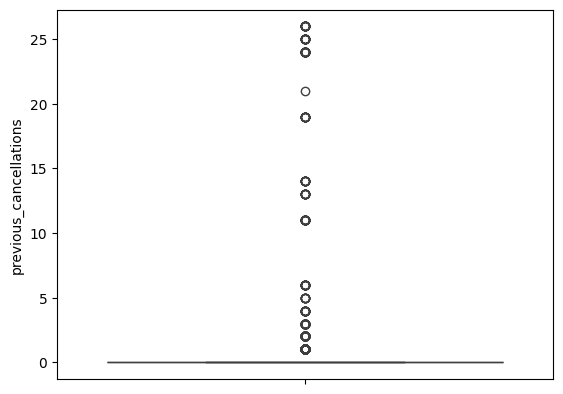

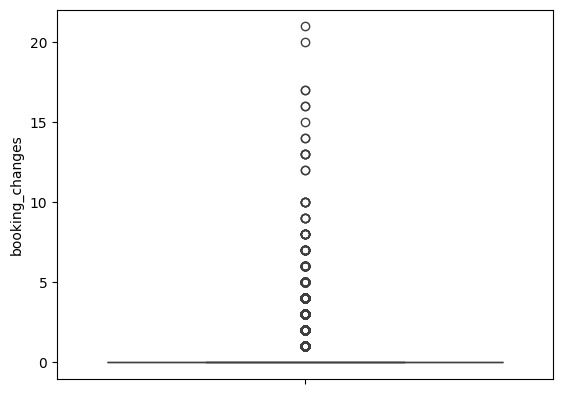

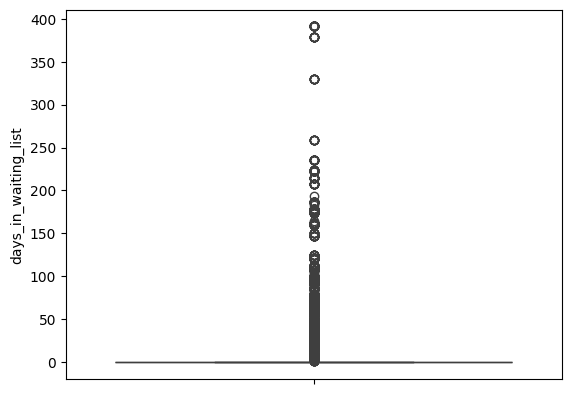

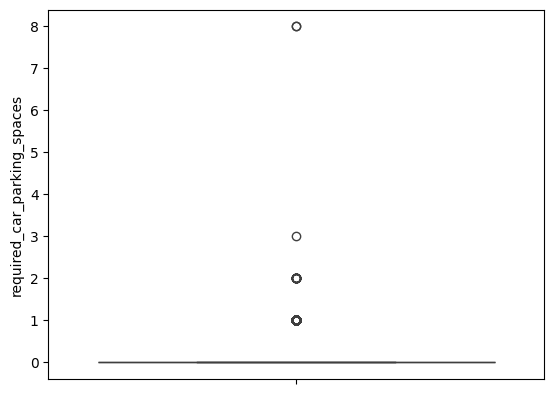

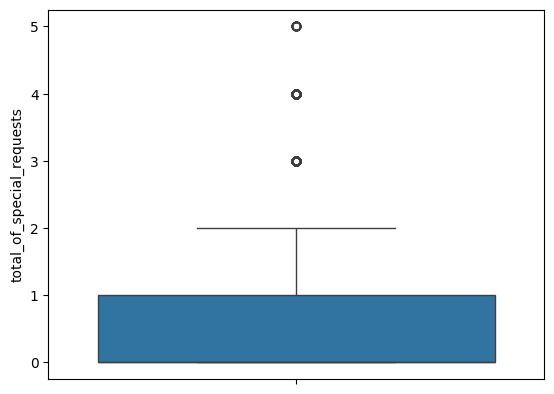

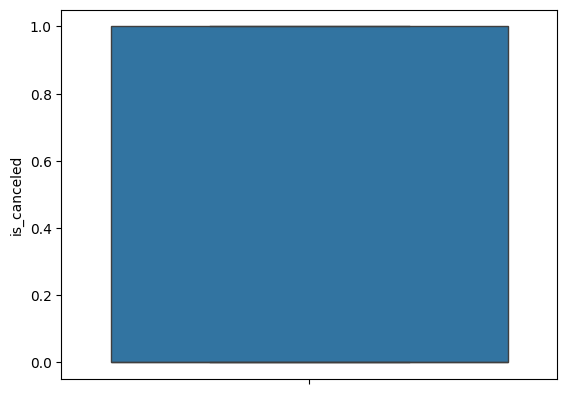

In [12]:
for out in df_clean.select_dtypes(['float64','int64']) :
    sns.boxplot(df[out])
    plt.show()

Terdapat Outliers pada data numberiknya maka nanti akan menggunakan Robust Scaler untuk scalingnya.

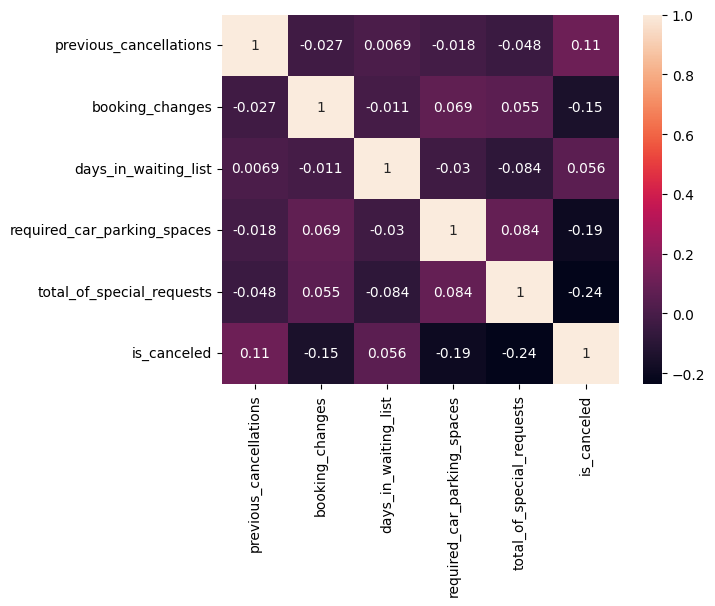

In [13]:
sns.heatmap(df_clean.select_dtypes(['float64','int64']).corr(),annot=True)
plt.show()

Dari Heatmap di atas kseimpulan yang di dapat :
1. Korelasi pembatalan dengan previous cancellations menunjukan bahawa semakin banyak pembatalan sebelumnya maka mungkin untuk membatalkan lagi.
2. Korelasi pembatalan dengan booking changes lemah negatif, bisa jadi tamu yang sering ubah booking cenderung tidak membatalkan.
3. korelasi pembatalan dengan days in waiting list sangat lemah jadi hampir tidak berpengaruh.
4. Korelasi pembatalan dengan required car parking spaces sangat sedang jadi kecil kemungkinan dibatalkan.
5. Korelasi pembatlan dengan total of special request menjadi yang terkuat (negatif). Jadi semakin banyak permintaan khusus maka makin kecil kemungkinan membatalkan pesanan kamar.

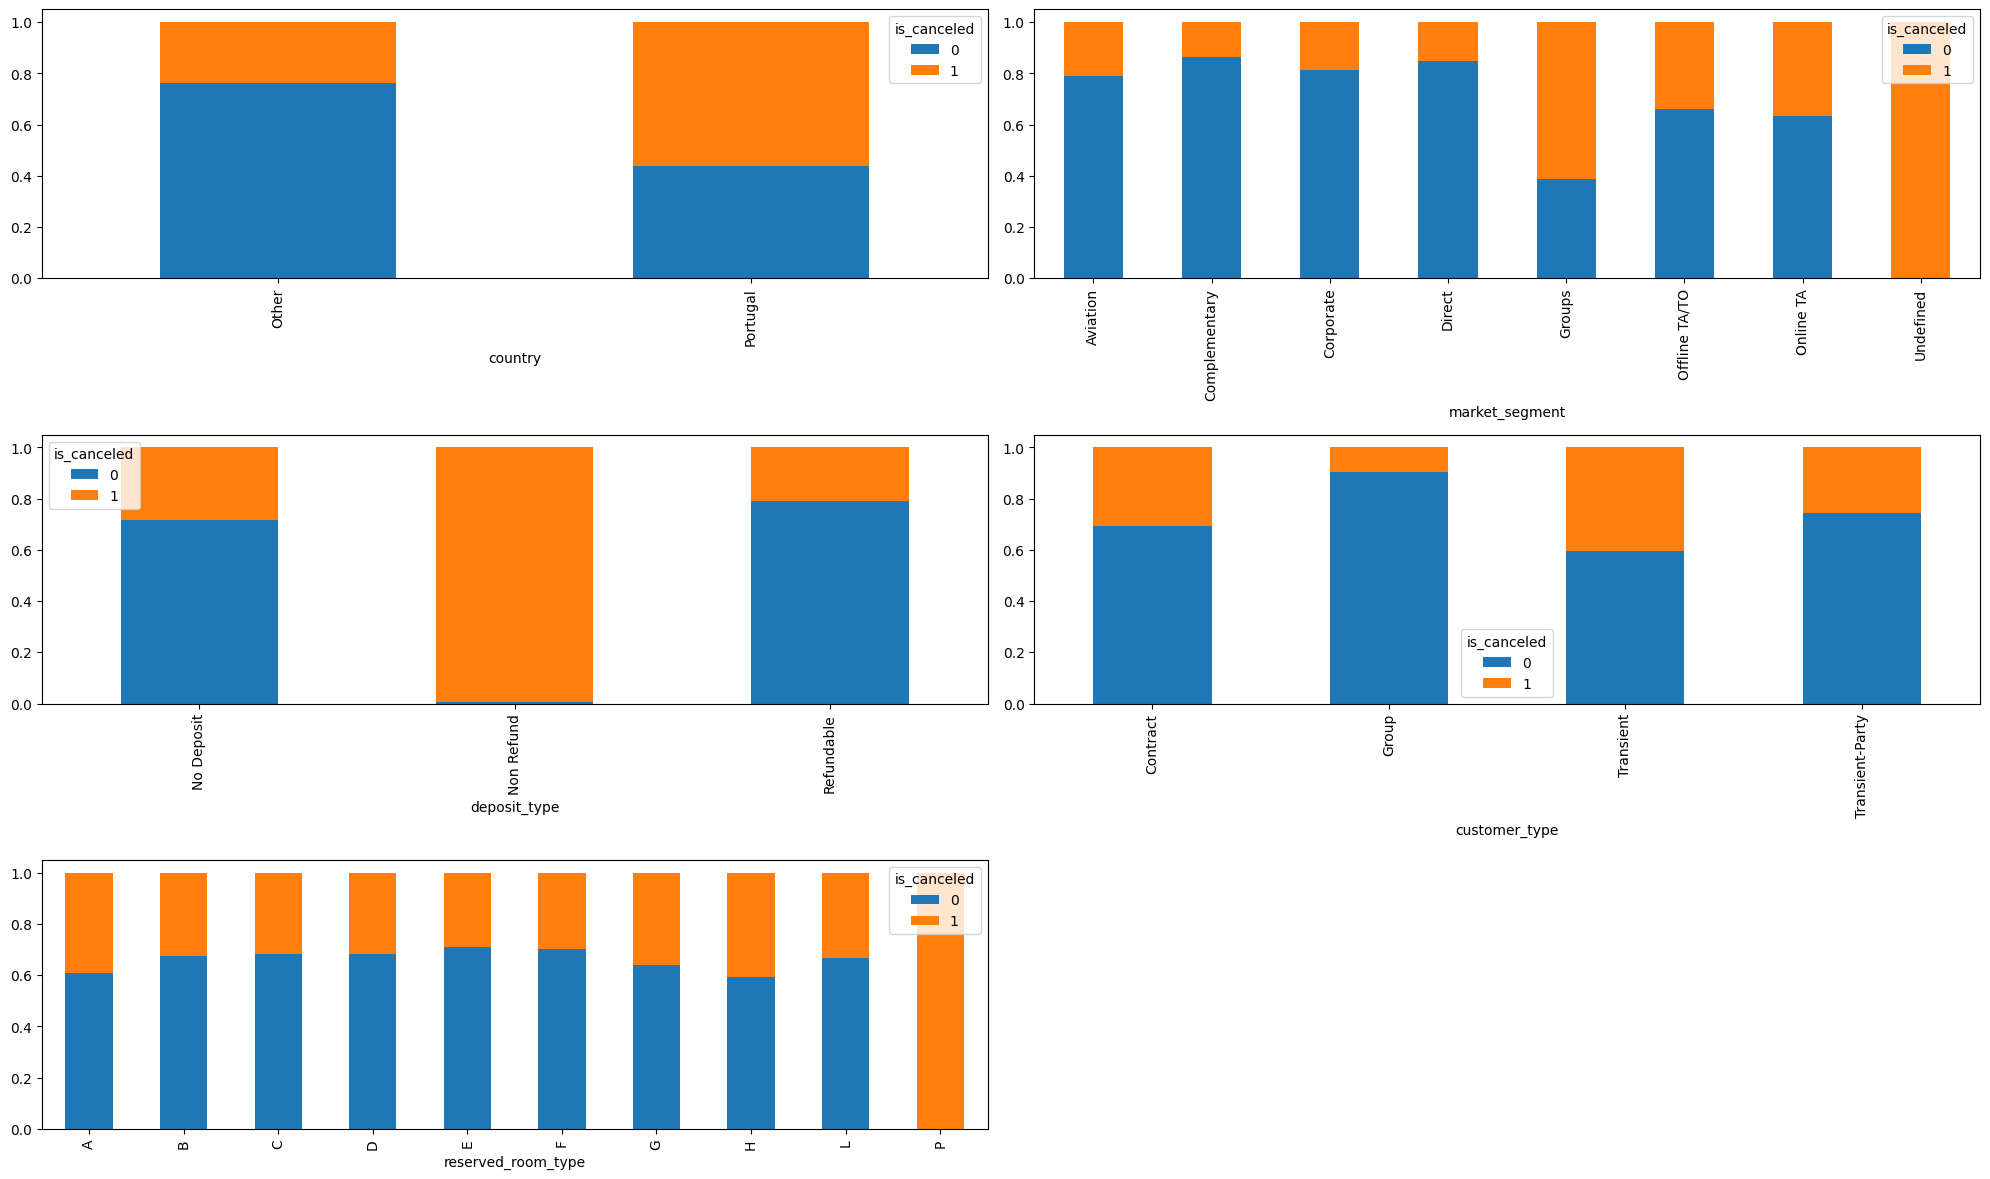

In [14]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df_clean.select_dtypes(['object']).columns:
    count +=1
    ax= plt.subplot(5,2,count)
    pd.crosstab(df_clean[i],df_clean['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [15]:
for i in df_clean.select_dtypes(['object']).columns:
    relevent_df = df_clean.groupby(i)['is_canceled'].value_counts(normalize=True).unstack()
    display(relevent_df.sort_values(by=[1.0], ascending=False))

is_canceled,0,1
country,,
Portugal,0.438162,0.561838
Other,0.764377,0.235623


is_canceled,0,1
market_segment,,
Undefined,NaN,1.000000
Groups,0.386791,0.613209
Online TA,0.633755,0.366245
Offline TA/TO,0.660424,0.339576
Aviation,0.787879,0.212121
Corporate,0.815158,0.184842
Direct,0.847425,0.152575
Complementary,0.865613,0.134387


is_canceled,0,1
deposit_type,,
Non Refund,0.006238,0.993762
No Deposit,0.716868,0.283132
Refundable,0.790909,0.209091


is_canceled,0,1
customer_type,,
Transient,0.594146,0.405854
Contract,0.692922,0.307078
Transient-Party,0.744331,0.255669
Group,0.904535,0.095465


is_canceled,0,1
reserved_room_type,,
P,NaN,1.000000
H,0.593516,0.406484
A,0.609177,0.390823
G,0.639082,0.360918
L,0.666667,0.333333
B,0.675985,0.324015
C,0.683036,0.316964
D,0.683969,0.316031
F,0.701772,0.298228


In [16]:
df_clean[df_clean['market_segment'] == 'Undefined'][['market_segment','is_canceled']]

,market_segment,is_canceled
70217,Undefined,1


In [17]:
df_clean[df_clean['reserved_room_type'] == 'P'][['reserved_room_type','is_canceled']]

,reserved_room_type,is_canceled
20994,P,1
21769,P,1


Kesimpulan dari visualisasi dan tabel di atas adalah :
1. Tamu yang berasal dari Portugal cenderung lebih sering membatalkan dibandingkan negara lain.
2. Untuk market segment yang terjadi adalah jika undefined itu selalu membatalkan pemesanan (karena data market segment undefined hanya ada 1). Jadi selain undefined yang cenderung      membatalkan adalah Groups dibandingkan dengan market segment yang lain.
4. Tipe deposit dengan non refund sering melakukan pembatalan dibandingkan dengan tipe deposit lainnya.
5. Tipe tamu atau tipe customer yang cenderung membatalkan pesanan adalah Transient dibandingkan tipe customer lain.
6. Tipe kamar P menjadi tipe kamar yang selalu dibatalkan pesannya (karena datanya berjumlah sedikit, hanya 2). Selain itu tipe kamar H menjadi tipe yang cenderung dibatalkan.


## **Data Preparation**

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83222 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83222 non-null  object
 2   previous_cancellations       83222 non-null  int64 
 3   booking_changes              83222 non-null  int64 
 4   deposit_type                 83222 non-null  object
 5   days_in_waiting_list         83222 non-null  int64 
 6   customer_type                83222 non-null  object
 7   reserved_room_type           83222 non-null  object
 8   required_car_parking_spaces  83222 non-null  int64 
 9   total_of_special_requests    83222 non-null  int64 
 10  is_canceled                  83222 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.6+ MB


Tabel kategorikal dari data di atas ada sebanyak 5 tabel yaitu country, market_segment, deposit_type, customer_type, reserved_room_type.
Maka dari itu encoding diperlukan untuk mengubah tabel kategorikal menjadi angka.
Dari tabel di atas untuk encodingnya menggunakan One Hot Encoding, binary Encoding dan juga Ordinal Encoding.

1. Tabel country akan diencode menggunakan One Hot Encoding karena isinya sudah diubah menjadi 2 unique saja yaitu Portugal dan Other.
2. Tabel market_segment akan diencode menggunakan binary encoding karena uniqenya lebih dari 5, ini dilakukan untuk menghindari overfitting karena terlalu banyak tabel yang dibentuk.
3. Tabel deposit_type, customer_type sama seperti tabel country akan diencode menggunakan One Hot Encoding.
4. Tabel reserved_room_type akan diencode menggunakan Ordinal Encoding karena tipe kamar termasuk nilai yang bertingkat dimulai dari tipe A yang akan diubah ke angka 0 dan bertingkat ke selanjutnya.

Untuk Tabel Numerikalnya akan dilakukan scaling menggunakan Robust Scaler karena dari data di atas setiap tabel numerikal memiliki outlier.

In [19]:
#membuat mapping ordinal
ordinal = [
    {'col':'reserved_room_type',
    'mapping':{
        'A' : 0,
        'B' : 1, 
        'C' : 2, 
        'D' : 3, 
        'E' : 4, 
        'F' : 5,
        'G' : 6,
        'H' : 7,
        'L' : 8, 
        'P' : 9
    }}
]

In [20]:
#membuat nama tabel yang diencode
one_hoten = ['country', 'deposit_type', 'customer_type']
binaryen = ['market_segment']
ordinalen = ['reserved_room_type']
robscal = ['previous_cancellations', 'booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']

In [21]:
#Membuat preprosesing
preproses = ColumnTransformer(transformers=[
    ('Onehot',OneHotEncoder(),one_hoten),
    ('Binary',ce.BinaryEncoder(),binaryen),
    ('Ordinal',ce.OrdinalEncoder(mapping = ordinal),ordinalen),
    ('scaler',RobustScaler(),robscal)
],remainder='passthrough')


In [22]:
#Split data
x = df_clean.drop(columns='is_canceled')
y = df_clean['is_canceled']

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=2020,
    stratify=y
)

# **MODELING & EVALUASION**

In [23]:
#Mendefine model model
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dectree = DecisionTreeClassifier()
randomfor = RandomForestClassifier()
adaboost = AdaBoostClassifier()
svm = SVC()
xgb = XGBClassifier()

In [24]:
#Pipeline
def pipe(mod) :
    return Pipeline([
        ('Preproses',preproses),
        ('model',mod)
    ])

In [25]:
#Membuat cross validation
models = [logreg, knn, dectree, randomfor, adaboost, svm, xgb]
mean = []
std = []
f2_score = make_scorer(fbeta_score, beta=2)

for mod in models :
    model_pipe = pipe(mod)
    crossval = cross_val_score(model_pipe,xtrain,ytrain,cv=StratifiedKFold(n_splits=10),scoring=f2_score)
    mean.append(crossval.mean())
    std.append(crossval.std())

display = pd.DataFrame({
    'Model' : 'Logreg, KNN, Desicion Tree, Random Forest, Adaboost, SVM, XGB'.split(', '),
    'Mean Score' : mean,
    'Std Score' : std
})

display.sort_values('Mean Score', ascending=False)

c:\Users\Bima Satria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Bima Satria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

,Model,Mean Score,Std Score
3,Random Forest,0.704131,0.009777
2,Desicion Tree,0.701531,0.009846
6,XGB,0.700881,0.010345
1,KNN,0.681145,0.049340
4,Adaboost,0.592155,0.010433
0,Logreg,0.574317,0.010042
5,SVM,0.432681,0.012540


In [26]:
models = [logreg, knn, dectree, randomfor, adaboost, svm, xgb]
list_model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Adaboost', 'SVM', 'XGBoost']
score_f2 = []

for mod, name in zip(models, list_model):
    estimator = pipe(mod)
    estimator.fit(xtrain, ytrain)
    ypred = estimator.predict(xtest)
    f2 = fbeta_score(ytest, ypred, beta=2)
    score_f2.append(f2)
    print(f"{name}:\n", classification_report(ytest, ypred))

result_df = pd.DataFrame({
    'Model': list_model,
    'F2 Score': score_f2
}).sort_values(by='F2 Score', ascending=False).reset_index(drop=True)

result_df

c:\Users\Bima Satria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84     10498
           1       0.79      0.53      0.64      6147

    accuracy                           0.78     16645
   macro avg       0.78      0.73      0.74     16645
weighted avg       0.78      0.78      0.76     16645

KNN:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84     10498
           1       0.75      0.68      0.71      6147

    accuracy                           0.80     16645
   macro avg       0.78      0.77      0.78     16645
weighted avg       0.79      0.80      0.79     16645

Decision Tree:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85     10498
           1       0.78      0.68      0.73      6147

    accuracy                           0.81     16645
   macro avg       0.80      0.78      0.79     16645
weighted avg       0.81      0

c:\Users\Bima Satria\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Adaboost:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84     10498
           1       0.78      0.55      0.65      6147

    accuracy                           0.78     16645
   macro avg       0.78      0.73      0.74     16645
weighted avg       0.78      0.78      0.77     16645

SVM:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84     10498
           1       0.97      0.38      0.54      6147

    accuracy                           0.77     16645
   macro avg       0.85      0.69      0.69     16645
weighted avg       0.82      0.77      0.73     16645

XGBoost:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85     10498
           1       0.78      0.68      0.72      6147

    accuracy                           0.81     16645
   macro avg       0.80      0.78      0.79     16645
weighted avg       0.81      0.81      0.81    

,Model,F2 Score
0,Decision Tree,0.699213
1,Random Forest,0.697585
2,XGBoost,0.694709
3,KNN,0.689609
4,Adaboost,0.587991
5,Logistic Regression,0.572110
6,SVM,0.430827


C:\Users\Bima Satria\AppData\Local\Temp\ipykernel_20544\488529626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F2 Score', y='Model', data=result_df, palette='viridis')


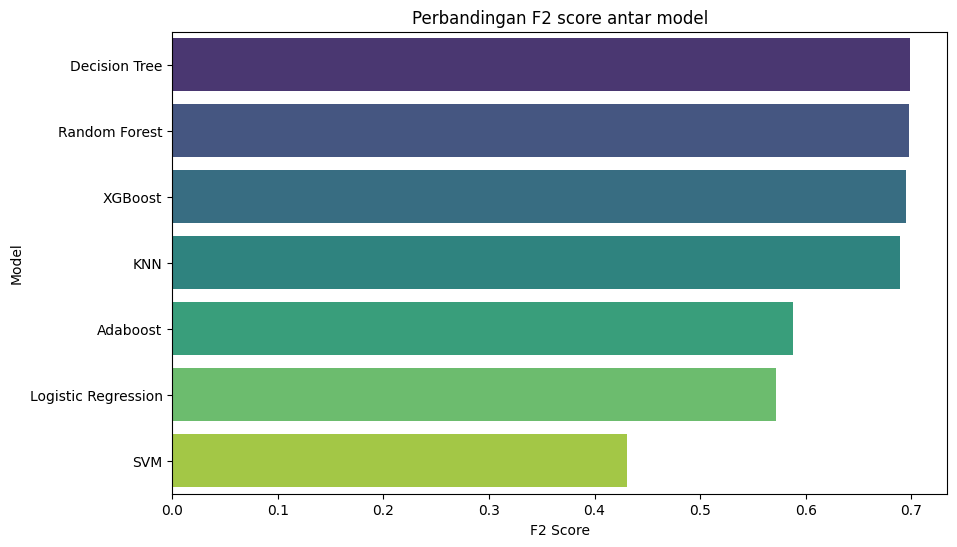

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(x='F2 Score', y='Model', data=result_df, palette='viridis')
plt.title('Perbandingan F2 score antar model')
plt.xlabel('F2 Score')
plt.ylabel('Model')
plt.show()

Dari Cross Validation di atas Random Forest menjadi model terbaik dibandingkan dengan yang lain namun perbedaan dengan Decision tree sangat kecil. Akan tetapi Random Forest menjadi yang tertinggi dari semuanya, untuk itu model yang digunakan selanjutnya adalah random forest.

Random Forest sendiri adalah model machine learning yang bekerja dengan membangun banyak decision tree sebagai sebuah ensemble. Yang bekerja dengan membangun banyak decision tree, lalu menggabungkan hasilnya untuk membuat prediksi yang lebih akurat dan stabil.


In [28]:
def train_error(xtrain, ytrain, model):
    predictions = model.predict(xtrain)
    predictProba = model.predict_proba(xtrain)
    accuracy = accuracy_score(ytrain, predictions)
    f2 = fbeta_score(ytrain, predictions, beta=2)
    roc_auc = roc_auc_score(ytrain, predictProba[:,1])
    recall = recall_score(ytrain, predictions)
    precision = precision_score(ytrain, predictions)
    report = classification_report(ytrain, predictions)
    return { 
        'report': report, 
        'f2' : f2, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def validation_error(xtest, ytest, model):
    predictions = model.predict(xtest)
    predictProba = model.predict_proba(xtest)
    accuracy = accuracy_score(ytest, predictions)
    f2 = fbeta_score(ytest, predictions, beta=2)
    roc_auc = roc_auc_score(ytest, predictProba[:,1])
    recall = recall_score(ytest, predictions)
    precision = precision_score(ytest, predictions)
    report = classification_report(ytest, predictions)
    return { 
        'report': report, 
        'f2' : f2, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }

def metrics(xtrain, ytrain, xtest, ytest, model):
    model.fit(xtrain, ytrain)
    train_error_def = train_error(xtrain, ytrain, model)
    validation_error_def = validation_error(xtest, ytest, model)
    return train_error_def, validation_error_def

In [29]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2020)
data = xtrain
target = ytrain

In [30]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []


for train_index, val_index in kf.split(data, target):
    
    # split data
    xtrain, xval = data.iloc[train_index], data.iloc[val_index]
    ytrain, yval = target.iloc[train_index], target.iloc[val_index]
    
    # oversampling
    ros = RandomOverSampler()
    x_ros, y_ros = ros.fit_resample(xtrain, ytrain)

    # model pipeline
    randfor = RandomForestClassifier()
    estimator = Pipeline([
        ('preprocess', preproses),
        ('model', randomfor)
    ])

    # hitung metrik
    train_error_wo, val_error_wo = metrics(xtrain, ytrain, xval, yval, estimator)
    train_error_w, val_error_w = metrics(x_ros, y_ros, xval, yval, estimator)

    # simpan hasil
    train_errors_without_oversampling.append(train_error_wo)
    validation_errors_without_oversampling.append(val_error_wo)

    train_errors_with_oversampling.append(train_error_w)
    validation_errors_with_oversampling.append(val_error_w)

In [31]:
listItem = []

for tr, val in zip(train_errors_without_oversampling, validation_errors_without_oversampling):
    listItem.append([
        tr['accuracy'], val['accuracy'],
        tr['roc'], val['roc'],
        tr['f2'], val['f2'],
        tr['recall'], val['recall'],
        tr['precision'], val['precision']
    ])

listItem.append(list(np.mean(listItem, axis=0)))
dfEvaluate = pd.DataFrame(
    listItem, 
    columns=[
        'Train Accuracy', 'Test Accuracy', 
        'Train ROC AUC', 'Test ROC AUC', 
        'Train F2 Score', 'Test F2 Score', 
        'Train Recall', 'Test Recall', 
        'Train Precision', 'Test Precision'
    ]
)

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex

dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F2 Score,Test F2 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.816035,0.810904,0.897598,0.885896,0.710097,0.704600,0.693903,0.689178,0.783208,0.773869
1,0.816018,0.810754,0.897322,0.888624,0.705409,0.695838,0.687531,0.677380,0.787300,0.780957
2,0.815935,0.812406,0.896888,0.894303,0.704697,0.705608,0.686613,0.689711,0.787681,0.777269
3,0.815968,0.811805,0.897516,0.887618,0.704610,0.693654,0.686477,0.673851,0.787852,0.786053
4,0.816469,0.805197,0.897831,0.884835,0.723796,0.700714,0.712510,0.686865,0.772756,0.762184
5,0.816886,0.802643,0.898119,0.881317,0.705969,0.690129,0.687833,0.673851,0.789203,0.763947
6,0.816502,0.806398,0.898105,0.883516,0.715320,0.701478,0.700804,0.687271,0.779941,0.764706
7,0.816238,0.809974,0.897502,0.886990,0.705960,0.696752,0.688164,0.679007,0.787413,0.778089
8,0.815688,0.814331,0.896953,0.893445,0.711481,0.715766,0.695982,0.702604,0.781052,0.773746
9,0.816338,0.809524,0.897546,0.886865,0.708691,0.695071,0.691824,0.676973,0.785267,0.778297


In [32]:
listItem = []

for tr, val in zip(train_errors_with_oversampling, validation_errors_with_oversampling):
    listItem.append([
        tr['accuracy'], val['accuracy'],
        tr['roc'], val['roc'],
        tr['f2'], val['f2'],        #
        tr['recall'], val['recall'],
        tr['precision'], val['precision']
    ])

listItem.append(list(np.mean(listItem, axis=0)))

dfEvaluate = pd.DataFrame(
    listItem, 
    columns=[
        'Train Accuracy', 'Test Accuracy', 
        'Train ROC AUC', 'Test ROC AUC', 
        'Train F2 Score', 'Test F2 Score', 
        'Train Recall', 'Test Recall', 
        'Train Precision', 'Test Precision'
    ]
)

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F2 Score,Test F2 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.802339,0.791829,0.898233,0.884852,0.794849,0.763283,0.791358,0.783157,0.809128,0.692945
1,0.801294,0.802794,0.897979,0.888649,0.790119,0.760234,0.784954,0.772172,0.811472,0.715956
2,0.802966,0.803545,0.898595,0.893823,0.790618,0.763417,0.784907,0.776332,0.814319,0.715786
3,0.803204,0.793782,0.898654,0.887421,0.791204,0.749160,0.785648,0.761285,0.814238,0.704289
4,0.803032,0.796185,0.898894,0.885270,0.792914,0.747874,0.788215,0.758032,0.812287,0.709825
5,0.803218,0.793181,0.899426,0.880827,0.791063,0.753671,0.785436,0.768198,0.814398,0.700668
6,0.802728,0.791829,0.898879,0.883523,0.792417,0.755911,0.787633,0.772265,0.812152,0.696881
7,0.802053,0.801863,0.898466,0.886822,0.788558,0.757357,0.782341,0.768511,0.814451,0.715801
8,0.801167,0.800060,0.897115,0.892485,0.790992,0.771034,0.786283,0.789666,0.810407,0.704537
9,0.802159,0.797506,0.898458,0.885897,0.790124,0.753924,0.784563,0.766070,0.813180,0.708961


In [33]:
def pipe_with_ros(model):
    return Pipeline([
        ('preprocess', preproses),
        ('ros', RandomOverSampler(random_state=2020)),
        ('model', model)
    ])

In [34]:
hyper_param = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']
}

In [35]:
pipeline = pipe_with_ros(RandomForestClassifier(random_state=2020))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=hyper_param,
    scoring=f2_score,
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid.fit(data, target) 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2020, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('Onehot',
                                                                         OneHotEncoder(),
                                                                         ['country',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['market_segment']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'reserved_room_type',...
                                        RandomOverSampler(random_state=2020)),
                                       ('model',
                                        RandomForestClassifier(random_state=2020))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__min_samples_leaf': [1, 2],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
             verbose=2)

In [36]:
print("Best Params:", grid.best_params_)
print("Best F2 Score:", grid.best_score_)
best_model = grid.best_estimator_

Best Params: {'model__max_depth': 20, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best F2 Score: 0.7590175049946891


Dari tuningan di atas parameter terbaik yang didapat dari model random forest adalah :
model__max_depth: 20
model__max_features: 'sqrt'
model__min_samples_leaf: 1
model__min_samples_split: 2
model__n_estimators: 200

Dengan Score F2 = 0.7590175049946891

In [37]:
# Model sebelum tuning
model_default = pipe(RandomForestClassifier())
model_default.fit(data, target)
y_pred_default = model_default.predict(data)
f2_default = fbeta_score(target, y_pred_default, beta=2)
report_default = classification_report(target, y_pred_default)

# Model sesudah tuning
best_model = grid.best_estimator_
y_pred_best = best_model.predict(data)
f2_best = fbeta_score(target, y_pred_best, beta=2)
report_best = classification_report(target, y_pred_best)


print(f'''MODEL DEFAULT
      
    {report_default}
    F2 Score Default : {f2_default}
      ''')

print(f'''MODEL TUNED
      
    {report_best}
    F2 Score Tuned : {f2_best}
      ''')

MODEL DEFAULT
      
                  precision    recall  f1-score   support

           0       0.83      0.89      0.86     41992
           1       0.78      0.70      0.74     24585

    accuracy                           0.82     66577
   macro avg       0.81      0.79      0.80     66577
weighted avg       0.81      0.82      0.81     66577

    F2 Score Default : 0.7126588696873727
      
MODEL TUNED
      
                  precision    recall  f1-score   support

           0       0.86      0.82      0.84     41992
           1       0.72      0.78      0.75     24585

    accuracy                           0.81     66577
   macro avg       0.79      0.80      0.80     66577
weighted avg       0.81      0.81      0.81     66577

    F2 Score Tuned : 0.7671018109681961
      


Setelah mentuning model, hasil report dan score F2nya naik. Walaupun hanya naik beberapa persen namun menjadikan modelnya menjadi lebih optimal. Jadi akan lebih baik jika menggunakan model Random Forest yang sudah dituning sebagai model akhir

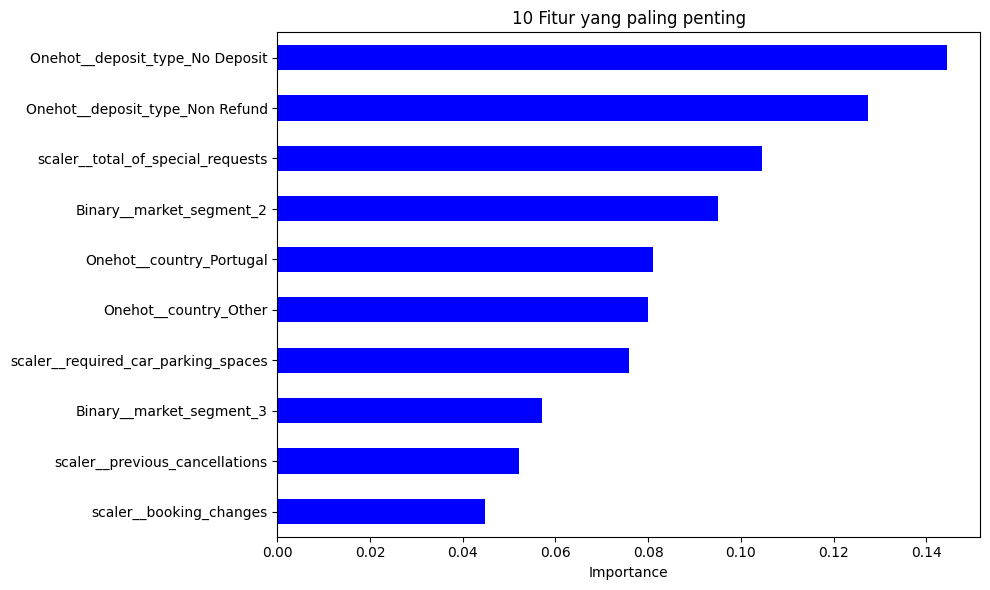

In [38]:
best_model = grid.best_estimator_
feature_names = best_model.named_steps['preprocess'].get_feature_names_out()
importances = best_model.named_steps['model'].feature_importances_
coef1 = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
coef1.plot(kind='barh', title='10 Fitur yang paling penting', color='blue')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # fitur terpenting di atas
plt.tight_layout()
plt.show()

Fitur yang paling penting adalah tipe deposit non refund lalu diikuti oleh tipe deposit no deposit dan seterusnya.

In [39]:
print(f'''MODEL TUNED
      
    {report_best}
    F2 Score Tuned : {f2_best}
      ''')

MODEL TUNED
      
                  precision    recall  f1-score   support

           0       0.86      0.82      0.84     41992
           1       0.72      0.78      0.75     24585

    accuracy                           0.81     66577
   macro avg       0.79      0.80      0.80     66577
weighted avg       0.81      0.81      0.81     66577

    F2 Score Tuned : 0.7671018109681961
      


[[34496  7496]
 [ 5405 19180]]


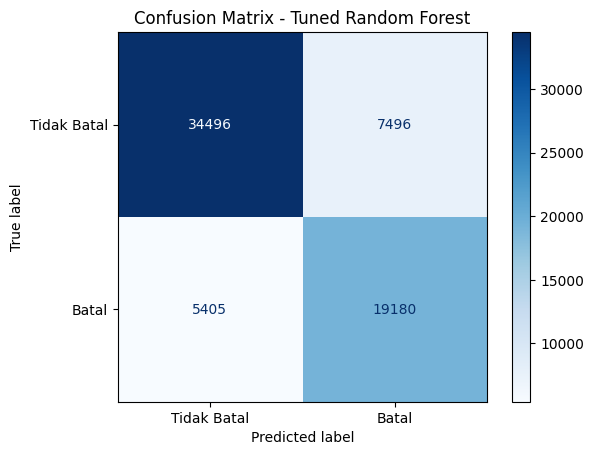

In [40]:
cm_tuned = confusion_matrix(target, y_pred_best)
print(cm_tuned)
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['Tidak Batal', 'Batal'])
disp_tuned.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

Setelah mentuning model, hasil report dan score F2nya naik. Walaupun hanya naik beberapa persen namun menjadikan modelnya menjadi lebih optimal. Jadi akan lebih baik jika menggunakan model Random Forest yang sudah dituning sebagai model akhir

Kelas 0 : Tidak Batal
Kelas 1 : Batal
True Positif sebanyak 19180 : Berarti prediksi tamu yang memang membatalkan pesanan berhasil diprediksi.

True Negatif sebanyak 34496 : berarti prediksi tamu yang tidak membatalkan berhasil diprediksi.

False Positif sebanyak 7496 : diprediksi membatalkan ternyata tidak

False Negatif sebanyak 5404 : Tamu gagal terdeksi oleh model untuk membatalkan.

# **KESIMPULAN & REKOMENDASI**

## **Kesimpulan**

Model ini bisa membantu bisnis perhotelan di portugal untuk mendeteksi resiko pembatalan sebesar 76% (dilihat dari score F2nya), namun bukan untuk keputusan overbooking. Dengan menggabungkan hasil prediksi, komunikasi ke pelanggan, dan sistem buffer internal, pemilik bisnis perhotelan bisa meningkatkan efisiensi tanpa mengorbankan pengalaman tamu.

Pemilik bisnis perhotelan juga dapat mengurangi kerugian dari kamar kosong dengan menyusun strategi overbooking yang aman.
Dengan menerapkan model ini, hotel tidak hanya bisa mengurangi pembatalan, tapi juga mengoptimalkan sumber daya, meningkatkan pendapatan, dan memberikan pengalaman pelanggan yang lebih baik secara proaktif.

## **Rekomendasi**

Karena masih ada beberapa tamu yang diprediksi batal padahal tidak, jangan langsung gunakan model ini untuk overbooking otomatis. Tapi gunakan prediksi ini dengan :
1. Mengirim reminder atau konfirmasi kepada tamu.
2. Memberikan insentif agar mereka melanjutkan reservasi (misalnya diskon kecil atau check-in cepat atau memberikan makan sarapan).
3. Melakukan prioritas layanan atau follow-up manual untuk tamu yang berisiko membatalkan pesanan.
4. Untuk mengatasi false negatifnya (yang akan membatalkan namun tidak terprediksi) maka sediakan buffer kamar terbatas atau sistem waiting list untuk mengantisipasi kekosongan mendadak.
5. Jika ingin menerapkan overbooking, batasi hanya pada level yang aman berdasarkan historical rate pembatalan, dan konfirmasi ulang reservasi sebelum mengambil tindakan.

In [42]:
import pickle

pickle.dump(best_model,open('best_model_rf_tuned.pkl', 'wb'))